In [1]:
import pandas as pd
import numpy as np
import time
import math
import random

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 

import matplotlib.pyplot as plt
from scipy.stats import norm



## Loading the data + preprocessing

In [2]:
dataset = pd.read_csv("train_data.csv")
y=dataset['windmill_generated_power(kW/h)']
X=dataset.drop(['windmill_generated_power(kW/h)'],axis=1)

In [10]:
dataset.head(10)

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074
5,WM_17873,2019-03-22 21:03:20,93.769973,30.326226,17.970619,-99.000000,43.816430,40.815795,2119.351653,72.345126,...,101.378184,NaN,1715.244121,97.746463,ABC,Low,2.504098,0.395642,24.673292,4.945780
6,WM_19873,2019-04-17 18:33:20,16.026249,-99.000000,44.072819,-0.196845,41.680583,43.384904,778.109985,40.284018,...,43.008746,528.003985,1222.931270,11.805113,BD,Low,2.917922,0.447341,33.593511,5.089173
7,WM_30330,2019-07-08 21:03:20,48.737826,12.716815,43.217778,-99.000000,-48.405089,44.125843,980.988531,43.691867,...,-99.000000,NaN,1177.637341,18.384873,BA,Low,2.938810,0.354881,29.944821,8.536889
8,WM_26069,2019-06-07 17:53:20,47.081729,-99.000000,-33.607048,-99.000000,43.055427,45.253628,957.580151,41.609787,...,43.216062,281.368625,-99.000000,19.486763,ABC,Low,1.651438,0.301550,46.733509,8.739166
9,WM_28915,2019-06-28 16:13:20,283.789329,18.887932,41.691469,52.337026,-62.724362,41.881256,1042.086135,65.280225,...,-99.000000,352.268521,1662.076277,20.100683,AC,Extremely Low,1.060817,0.201699,24.324068,1.948810


In [13]:
dataset.shape

(28200, 22)

In [14]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

## Train and Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
combi = pd.concat([X_train, y_train],
                  axis = 1)


combi1=combi.dropna(subset=['windmill_generated_power(kW/h)'])


In [17]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19740 entries, 24945 to 2732
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     19740 non-null  object 
 1   datetime                        19740 non-null  object 
 2   wind_speed(m/s)                 19564 non-null  float64
 3   atmospheric_temperature(°C)     17354 non-null  float64
 4   shaft_temperature(°C)           19738 non-null  float64
 5   blades_angle(°)                 19598 non-null  float64
 6   gearbox_temperature(°C)         19739 non-null  float64
 7   engine_temperature(°C)          19733 non-null  float64
 8   motor_torque(N-m)               19726 non-null  float64
 9   generator_temperature(°C)       19733 non-null  float64
 10  atmospheric_pressure(Pascal)    17824 non-null  float64
 11  area_temperature(°C)            19740 non-null  float64
 12  windmill_body_temperature(°C)

### Dropping the missing values in the target attribute

In [18]:
train_target=combi1['windmill_generated_power(kW/h)']
train_data=combi1.drop(['windmill_generated_power(kW/h)'],axis=1)

### Replacing the missing values in 'object' columns with the mode of the filled columns and Replacing the missing values in numerical columns with the median of the filled columns

In [23]:
categorical, numerical = [], []

for i in train_data.columns:

    if train_data[i].dtype == 'object':
        categorical.append(i)
    else:
        numerical.append(i)

for i in categorical:
    train_data[i].fillna(train_data[i].mode()[0], inplace=True)
for i in numerical:
    train_data[i].fillna(train_data[i].median(), inplace=True)

### Label encoder for categorical columns

In [24]:
label_encoder = LabelEncoder()
for i in categorical:
    train_data[i] = label_encoder.fit_transform(train_data[i])

### Scaling

In [25]:
scaler = StandardScaler()

scaler.fit(train_data)
train_data_s = pd.DataFrame(scaler.fit_transform(train_data),columns = train_data.columns)

### Applying the above pre-processing steps (handling of missing values, label encoding, scaler) to Test-data

In [26]:
combi2 = pd.concat([X_test, y_test],
                  axis = 1)
values=combi2.values

combi3=combi2.dropna(subset=['windmill_generated_power(kW/h)'])

test_target=combi3['windmill_generated_power(kW/h)']
test_data=combi3.drop(['windmill_generated_power(kW/h)'],axis=1)

In [27]:
categorical, numerical = [], []

for i in test_data.columns:

    if test_data[i].dtype == 'object':
        categorical.append(i)
    else:
        numerical.append(i)

for i in categorical:
    test_data[i].fillna(test_data[i].mode()[0], inplace=True)
for i in numerical:
    test_data[i].fillna(test_data[i].median(), inplace=True)

In [28]:
label_encoder = LabelEncoder()
for i in categorical:
    test_data[i] = label_encoder.fit_transform(test_data[i])

In [29]:
#scaler = StandardScaler()

#scaler.fit(test_data)
test_data_s = pd.DataFrame(scaler.fit_transform(test_data),columns = test_data.columns)

### Dropping the first two column (tracking-id, date-time)

In [30]:
train_data_s = train_data_s.iloc[: , 2:]
test_data_s = test_data_s.iloc[: , 2:]

In [31]:
combi4 = pd.concat([train_data_s, y_train],
                  axis = 1)

In [32]:
combi4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25621 entries, 0 to 28196
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 19588 non-null  float64
 1   atmospheric_temperature(°C)     19588 non-null  float64
 2   shaft_temperature(°C)           19588 non-null  float64
 3   blades_angle(°)                 19588 non-null  float64
 4   gearbox_temperature(°C)         19588 non-null  float64
 5   engine_temperature(°C)          19588 non-null  float64
 6   motor_torque(N-m)               19588 non-null  float64
 7   generator_temperature(°C)       19588 non-null  float64
 8   atmospheric_pressure(Pascal)    19588 non-null  float64
 9   area_temperature(°C)            19588 non-null  float64
 10  windmill_body_temperature(°C)   19588 non-null  float64
 11  wind_direction(°)               19588 non-null  float64
 12  resistance(ohm)                 

## HeatMap

In [33]:
import seaborn as sns

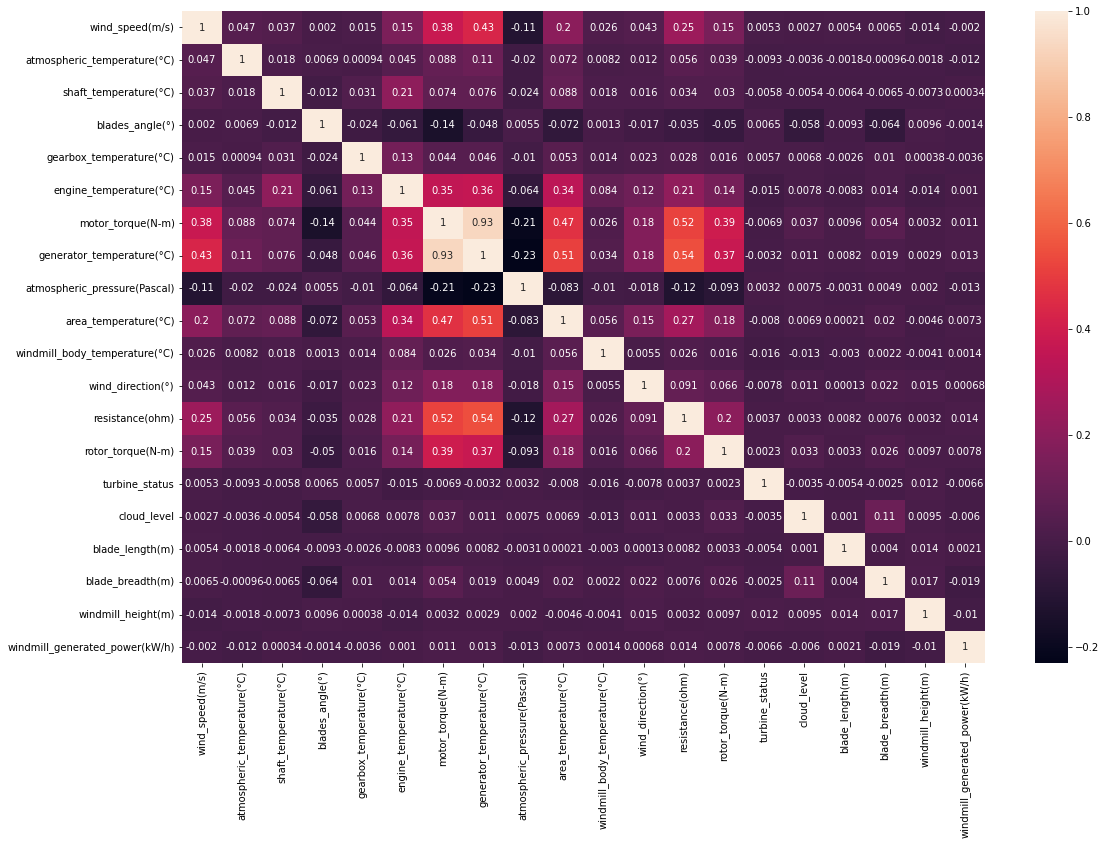

In [34]:
plt.figure(figsize=(18,12))
sns.heatmap(combi4.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

### Distribution

array([[<AxesSubplot:title={'center':'wind_speed(m/s)'}>,
        <AxesSubplot:title={'center':'atmospheric_temperature(°C)'}>,
        <AxesSubplot:title={'center':'shaft_temperature(°C)'}>,
        <AxesSubplot:title={'center':'blades_angle(°)'}>],
       [<AxesSubplot:title={'center':'gearbox_temperature(°C)'}>,
        <AxesSubplot:title={'center':'engine_temperature(°C)'}>,
        <AxesSubplot:title={'center':'motor_torque(N-m)'}>,
        <AxesSubplot:title={'center':'generator_temperature(°C)'}>],
       [<AxesSubplot:title={'center':'atmospheric_pressure(Pascal)'}>,
        <AxesSubplot:title={'center':'area_temperature(°C)'}>,
        <AxesSubplot:title={'center':'windmill_body_temperature(°C)'}>,
        <AxesSubplot:title={'center':'wind_direction(°)'}>],
       [<AxesSubplot:title={'center':'resistance(ohm)'}>,
        <AxesSubplot:title={'center':'rotor_torque(N-m)'}>,
        <AxesSubplot:title={'center':'turbine_status'}>,
        <AxesSubplot:title={'center':'cloud_lev

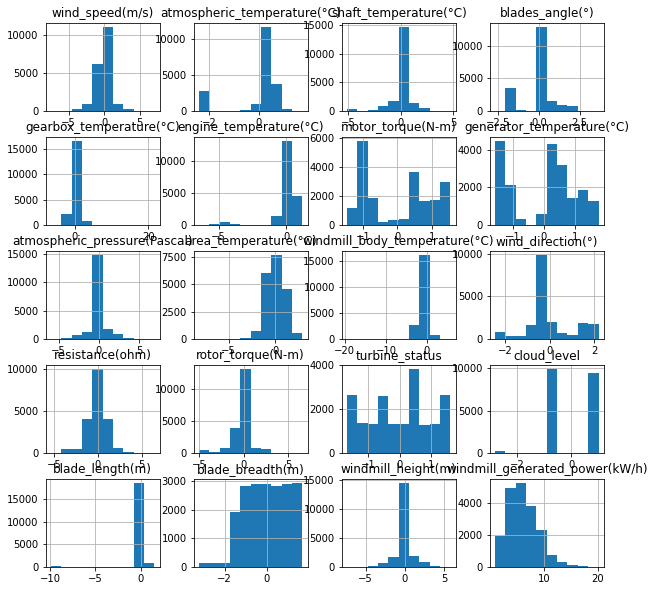

In [35]:
combi4.hist(figsize=(10,10)) # visualising the distrbution of train data

In [36]:
combi4.shape

(25621, 20)

### Reseting the index of the test and train target data

In [15]:
reset = train_target.reset_index()
train_target = reset.iloc[: , 1: ]
train_target

,windmill_generated_power(kW/h)
0,4.343044
1,6.118405
2,5.895660
3,6.037226
4,3.881010
...,...
19583,9.767195
19584,2.309105
19585,6.294015
19586,6.871810


In [16]:
reset = test_target.reset_index()
test_target = reset.iloc[: , 1: ]
test_target

,windmill_generated_power(kW/h)
0,4.261228
1,10.338474
2,2.773405
3,5.949011
4,9.549057
...,...
8400,5.585221
8401,5.722610
8402,5.423440
8403,5.621037


In [17]:
print( train_data_s.shape ) 
print( test_data_s.shape ) 
print( train_target.shape ) 
print( test_target.shape ) 

(19588, 19)
(8405, 19)
(19588, 1)
(8405, 1)


In [18]:
train_target.values.ravel()

array([4.34304423, 6.11840506, 5.89565982, ..., 6.29401486, 6.87181014,
       5.96554986])

## TPOT

In [19]:
import timeit
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from tpot import TPOTRegressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [21]:
start_time = time.time

tpot_config = {
    'sklearn.ensemble.RandomForestRegressor': {
        'max_depth': np.arange(1,250), 
        'n_estimators': np.arange(1,250), 
        'criterion': ['mae','mse'], 
        'max_features' : ["sqrt","log2"]
        
    },

    'sklearn.neighbors.KNeighborsRegressor': {
        'n_neighbors':np.arange(1,50), 
        'weights' : ['uniform', 'distance'], 
        'algorithm': ['ball_tree', 'kd_tree', 'brute'],
        'leaf_size': np.arange(1,50),
        'metric' : ['euclidean', 'manhattan', 'minkowski']
    },

    'sklearn.svm.SVR': {
        'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
        'C': [0.00001,0.0001,0.001,0.01,0.1,1], 
        'gamma': ['scale','auto']
    }
}


# instantiate tpot 
tpot = TPOTRegressor(verbosity=3,  
                    random_state=55, 
                    scoring='neg_mean_squared_error',
                    periodic_checkpoint_folder="intermediate_results",
                    n_jobs=-1, 
                    warm_start = True,
                    generations=30, 
                    population_size=30,
                    early_stop=8,
                    config_dict=tpot_config)
times = []
scores = []
winning_pipes = []

# run 2 iterations
for x in range(1):
    start_time = timeit.default_timer()
    tpot.fit(train_data_s,train_target.values.ravel() )
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(test_data_s, test_target.values.ravel()))
    tpot.export('tpot_ames.py')

# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

end_time = time.time()
print('process time is:', end_time-start_time)

3 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/930 [00:00<?, ?pipeline/s]

Skipped pipeline #4 due to time out. Continuing to the next pipeline.
Skipped pipeline #12 due to time out. Continuing to the next pipeline.
Skipped pipeline #16 due to time out. Continuing to the next pipeline.
Skipped pipeline #21 due to time out. Continuing to the next pipeline.
Skipped pipeline #26 due to time out. Continuing to the next pipeline.
Skipped pipeline #35 due to time out. Continuing to the next pipeline.
_pre_test decorator: _random_mutation_operator: num_test=0 Precomputed matrix must be a square matrix. Input is a 50x19 matrix..
_pre_test decorator: _random_mutation_operator: num_test=0 Precomputed matrix must be a square matrix. Input is a 50x20 matrix..
_pre_test decorator: _random_mutation_operator: num_test=0 Precomputed matrix must be a square matrix. Input is a 50x19 matrix..
Skipped pipeline #38 due to time out. Continuing to the next pipeline.
Skipped pipeline #42 due to time out. Continuing to the next pipeline.
Skipped pipeline #44 due to time out. Continui

c:\users\isili\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Times: [325.8257123016666]
Scores: [-0.30602298535923195]
Winning pipelines: [Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('featureunion-1',
                                                 FeatureUnion(transformer_list=[('featureunion-1',
                                                                                 FeatureUnion(transformer_list=[('functiontransformer',
                                                                                                                 FunctionTransformer(func=<function copy at 0x0000020DD74E8790>)),
                                                                                                                ('stackingestimator',
                                                                                                                 StackingEstimator(estimator=RandomForestRegressor(criterion='mse',
                                                                                              